In [1]:
pip install librosa numpy pandas


In [ ]:
import os
import zipfile
from glob import glob
from tqdm import tqdm
import librosa
import numpy as np

# Step 1: Unzip split_data.zip
def unzip_split_data(zip_path, extract_to="unzipped_data"):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
    print(f"✅ Extracted '{zip_path}' to '{extract_to}'")
    return extract_to

In [ ]:
# Step 2: Feature extraction
def extract_features(file_path, max_len=150):
    y, sr = librosa.load(file_path, sr=None)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    pitch = librosa.yin(y, fmin=75, fmax=500)
    energy = librosa.feature.rms(y=y)[0]

    mfcc = librosa.util.fix_length(mfcc, size=max_len, axis=1)
    pitch = librosa.util.fix_length(pitch, size=max_len)
    energy = librosa.util.fix_length(energy, size=max_len)

    combined = np.vstack([mfcc, pitch[np.newaxis, :], energy[np.newaxis, :]]).T
    return combined

In [ ]:
# Step 3: Build feature dataset
def build_feature_dataset(base_dir):
    X, y = [], []
    label_map = {"command": 0, "dictation": 1}

    for label_name in os.listdir(base_dir):
        label_dir = os.path.join(base_dir, label_name)
        if not os.path.isdir(label_dir): continue

        label_idx = label_map.get(label_name.lower())
        if label_idx is None:
            print(f"⚠️ Unknown label folder: {label_name}, skipping.")
            continue

        for wav_path in tqdm(glob(os.path.join(label_dir, "*.wav")), desc=f"Processing {label_name}"):
            features = extract_features(wav_path)
            X.append(features)
            y.append(label_idx)

    return np.array(X), np.array(y)

In [ ]:
# Step 4: Run full process
zip_path = "/content/split_data.zip"
unzipped_path = unzip_split_data(zip_path)

# Use the root of extracted folder as dataset path
X, y = build_feature_dataset(unzipped_path)

In [7]:
# Save as .npy
np.save("X_features.npy", X)
np.save("y_labels.npy", y)

print(f"✅ Done. Features shape: {X.shape}, Labels shape: {y.shape}")
print("💾 Saved: X_features.npy and y_labels.npy")


✅ Extracted '/content/split_data.zip' to 'unzipped_data'


Processing command: 100%|██████████| 50/50 [00:01<00:00, 43.74it/s]

✅ Done. Features shape: (100, 150, 15), Labels shape: (100,)
💾 Saved: X_features.npy and y_labels.npy


visualizing feature extractions for a command data

In [8]:
import matplotlib.pyplot as plt

# Load a sample file to visualize
sample_path = glob(os.path.join(unzipped_path, "command", "*.wav"))[0]  # or dictation/
print(f"🔍 Visualizing: {sample_path}")

# Extract features from the sample
features = extract_features(sample_path)

# Separate out MFCCs, pitch, and energy for plotting
mfccs = features[:, :13].T       # (13, time)
pitch = features[:, 13]          # (time,)
energy = features[:, 14]         # (time,)


🔍 Visualizing: unzipped_data/command/r1_3.wav


Plot MFCCs

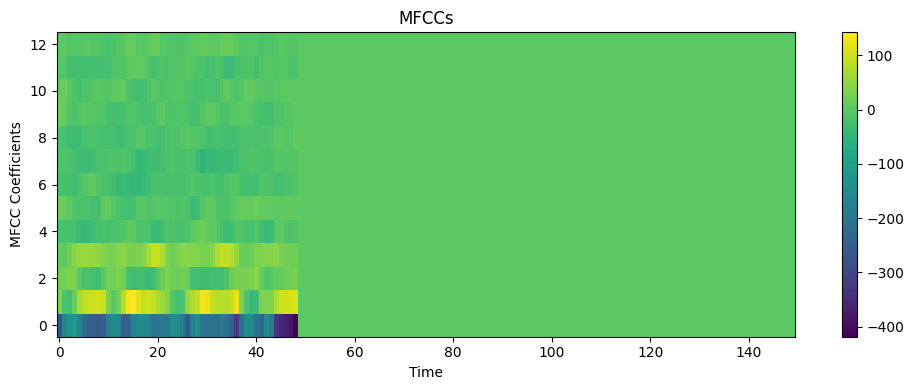

In [9]:
plt.figure(figsize=(10, 4))
plt.imshow(mfccs, aspect='auto', origin='lower', cmap='viridis')
plt.title("MFCCs")
plt.xlabel("Time")
plt.ylabel("MFCC Coefficients")
plt.colorbar()
plt.tight_layout()
plt.show()


 Plot Pitch

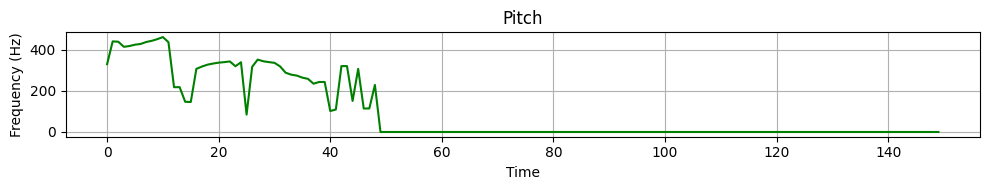

In [10]:
plt.figure(figsize=(10, 2))
plt.plot(pitch, color='green')
plt.title("Pitch")
plt.xlabel("Time")
plt.ylabel("Frequency (Hz)")
plt.grid(True)
plt.tight_layout()
plt.show()


Plot Energy

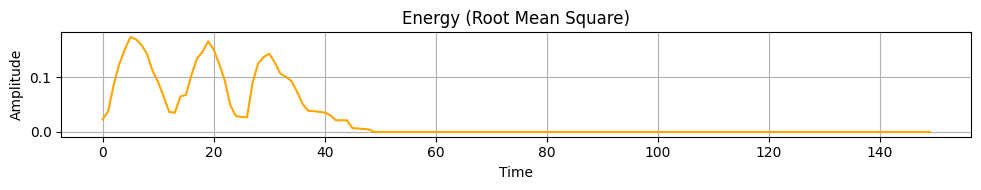

In [11]:
plt.figure(figsize=(10, 2))
plt.plot(energy, color='orange')
plt.title("Energy (Root Mean Square)")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.grid(True)
plt.tight_layout()
plt.show()


visualizing feature extractions for a dictation data

In [12]:
import matplotlib.pyplot as plt

# Load a sample file to visualize
sample_path = glob(os.path.join(unzipped_path, "dictation", "*.wav"))[1]  # or dictation/
print(f"🔍 Visualizing: {sample_path}")

# Extract features from the sample
features = extract_features(sample_path)

# Separate out MFCCs, pitch, and energy for plotting
mfccs = features[:, :13].T       # (13, time)
pitch = features[:, 13]          # (time,)
energy = features[:, 14]         # (time,)


🔍 Visualizing: unzipped_data/dictation/r9_4.wav


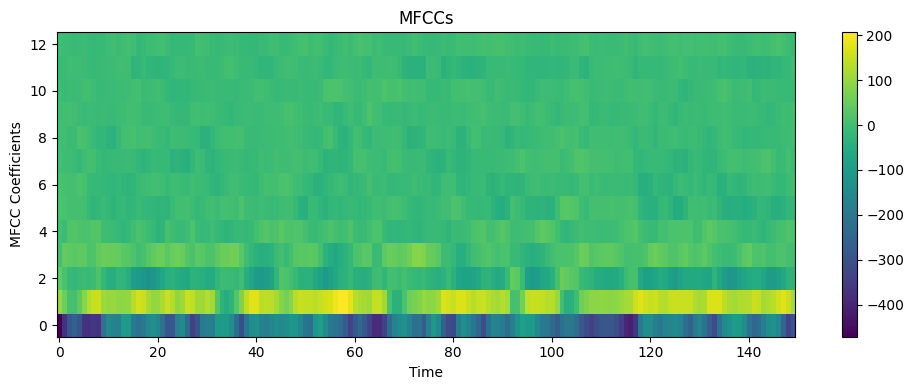

In [13]:
plt.figure(figsize=(10, 4))
plt.imshow(mfccs, aspect='auto', origin='lower', cmap='viridis')
plt.title("MFCCs")
plt.xlabel("Time")
plt.ylabel("MFCC Coefficients")
plt.colorbar()
plt.tight_layout()
plt.show()


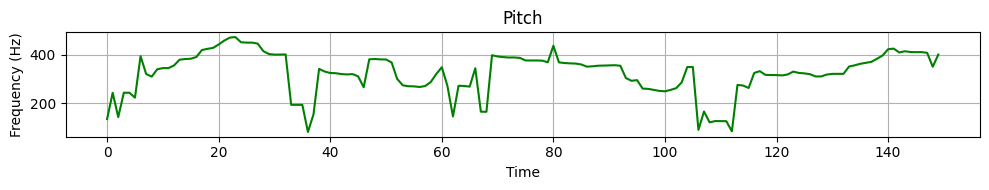

In [14]:
plt.figure(figsize=(10, 2))
plt.plot(pitch, color='green')
plt.title("Pitch")
plt.xlabel("Time")
plt.ylabel("Frequency (Hz)")
plt.grid(True)
plt.tight_layout()
plt.show()


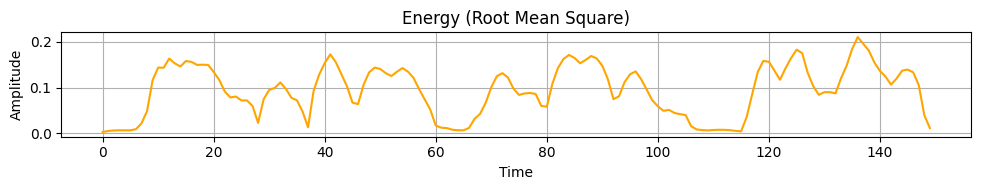

In [15]:
plt.figure(figsize=(10, 2))
plt.plot(energy, color='orange')
plt.title("Energy (Root Mean Square)")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.grid(True)
plt.tight_layout()
plt.show()
